In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

### Define Locally Weighted Regression Class

In [2]:
class LocalWeightRegression:
    def __init__(self, xs, ys, learning_rate=0.01, tau=0.5):
        
        #Hyperparameters
        self.learning_rate = learning_rate
        self.tau = tau
        
        #Training Data
        self.n = xs[0].shape[0] if len(xs[0].shape) > 0 else 1 #the shape of the input xs
        self.xs = np.append(xs.reshape(len(xs), self.n), np.ones((len(xs), 1)), axis=1)
        self.ys = ys.reshape(len(ys), 1)
        
        #Initialize Thetas on random interval between -10 and 10
        self.thetas = np.random.uniform(-10, 10, (self.n+1, 1))
    
    def guess(self, val, verbose=False):
        if verbose:
            print("guess thetas: ", *self.thetas)
        
        if type(val) == int or type(val) == float or type(val) == np.float64 or len(val) != self.n+1:
            val = np.append(np.array(val), [1])
        
        if len(val) != self.n + 1:
            raise ValueError
            
        return np.matmul(self.thetas.transpose(),  val)
    
    def calc_weight(self, x, val):
        dist = 0
        for i, j in enumerate(x):
            dist += (j - val[i]) ** 2 
        
        num = dist
        den = -2*(self.tau**2)
        return np.exp( num / den )
    
    def gradient_descent(self, val, epochs = 100, showloss=False):
        if type(val) == int or type(val) == float or type(val) == np.float64 or len(val) != self.n+1:
            val = np.append(np.array(val), [1])
        
        if len(val) != self.n + 1:
            raise ValueError
            
        #Calculates the loss of current thetas can be used to plot while training.
        def calcloss():
            losses = []
            for theta_ind, theta in enumerate(self.thetas):
                loss = 0
                for x_ind, x in enumerate(self.xs):
                    loss += self.calc_weight(x, val) * (self.ys[x_ind] - self.guess(x))**2
                losses.append(loss)
            return losses
        
        #Stochastic Gradient Descent
        for epoch in np.arange(0, epochs):
            if showloss:
                print("Epoch:", epoch)
            for x_ind, x in enumerate(self.xs):
                if showloss:
                    print(x_ind, *calcloss())
                self.thetas = self.thetas + 2 * self.learning_rate * self.calc_weight(x, val) * (self.ys[x_ind]-self.guess(val)) * np.array(val).reshape(self.n+1,1)
        return self.guess(val)
    
    def display(self, spacing=0.25, epochs = 100):
        plt.plot(self.xs[:, 0], self.ys, 'ob', markersize=2)
        for i in np.arange(min(list(self.xs[:,0])), max(list(self.xs[:,0])) + spacing, spacing):
            plt.plot(i, self.gradient_descent(i, epochs = epochs), 'or')
        plt.title("Locally Weighted Regression Model Data \n(blue) vs. Prediction (red)");
        pass
           

### Generate some non-linear dummy data.

In [3]:
xs = np.random.uniform(-2,6, 1000)
ys = ((xs - 2)**3 - 2*(xs - 2) + 4 ) #Apply wave
ys = ys + np.random.normal(0, 2, len(xs))
X = LocalWeightRegression(xs, ys, learning_rate=0.0005, tau=0.15)

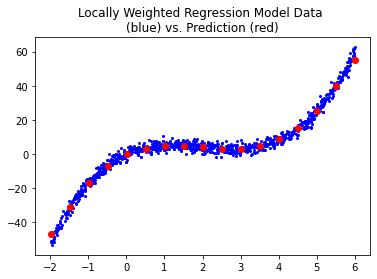

In [4]:
X.display(spacing=0.5)

In [5]:
xs = np.random.uniform(-2,12, 1000)
ys = np.sin(xs) #Apply wave
ys = ys + np.random.normal(0, 1, len(xs))
X = LocalWeightRegression(xs, ys, learning_rate=0.0005, tau=0.15)

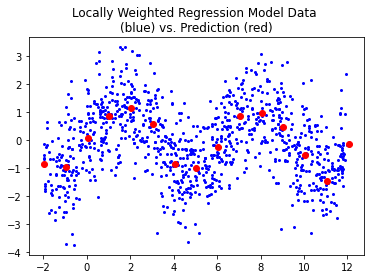

In [6]:
X.display(spacing=1)

In [7]:
xs = np.random.uniform(0,2*np.pi, 1000)
ys = 1 / np.cos(xs) #Apply wave
ys = ys + np.random.normal(0, 0.5, len(xs))
X = LocalWeightRegression(xs, ys, learning_rate=0.001, tau=0.15)

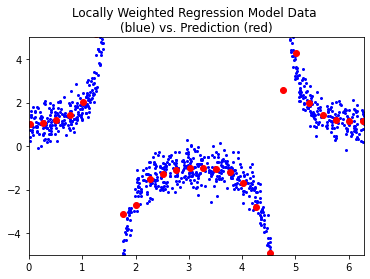

In [8]:
X.display()
plt.axis([0,2*np.pi,-5,5]);